# THE SPARKS FOUNDATION - GRIP

# DATA SCIENCE AND BUSINESS ANALYTICS

# NAME: ANANYA M

# TASK 2: Prediction Using Unsupervised ML

Q) From the given 'iris' dataset, predict the optimum number of clusters and represent it visually.

# Importing the Libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [67]:

iris = pd.read_csv("C:/Users/Ananya/Downloads/Iris.csv")

# Data Overview

In [68]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
iris.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [70]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [72]:

iris.shape

(150, 6)

# Data Preprocessing

In [73]:

x=iris.drop(['Id','Species'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K Means Clustering

A Cluster is a collection of data points aggregated together due to similarities in between.

K Means algorithm identifies k number of centroids, and then allocate every data point to the nearest clusters while keeping the centroids as small as possible.

Let us find out number of clusters for k-means classification.

In [74]:
x = iris.iloc[:,[0,1,2,3]].values


Elbow Method runs K-Means clustering on dataset on number of values for k and then for each values of k computes an average scores for all clusters.

In [75]:

iris_df=iris.drop(columns=["Species","Id"])#dropping the columns of Id and Species
#displaying the rearranged data
print(iris_df.head())
print(iris_df.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8


# Checking for Outliers and removing them

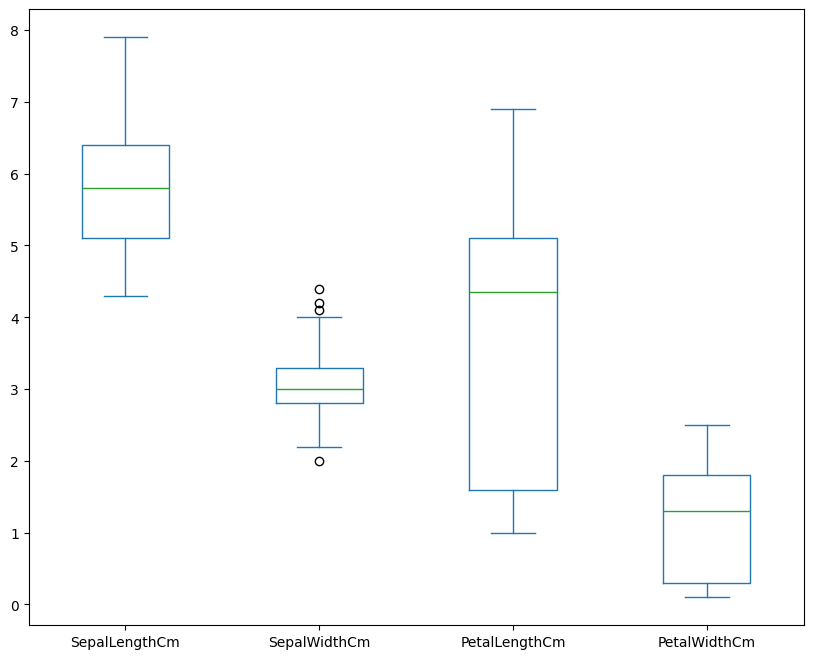

In [76]:
#checking for outliers by boxplot
plt.rcParams["figure.figsize"]=(10,8)
iris_df.plot(kind="box")
plt.show()

Only SepalWidth has some outliers. We now remove the outliers as the clusters are very sensitive to outliers and tend to take the clusters towards them.



In [77]:
#removing the ouliers using IQR method
Q1=iris_df.quantile(0.25)
Q3=iris_df.quantile(0.75)
IQR=Q3-Q1
iris_df=iris_df[~((iris_df<(Q1-1.5*IQR)) | (iris_df>(Q3+1.5*IQR))).any(axis=1)]

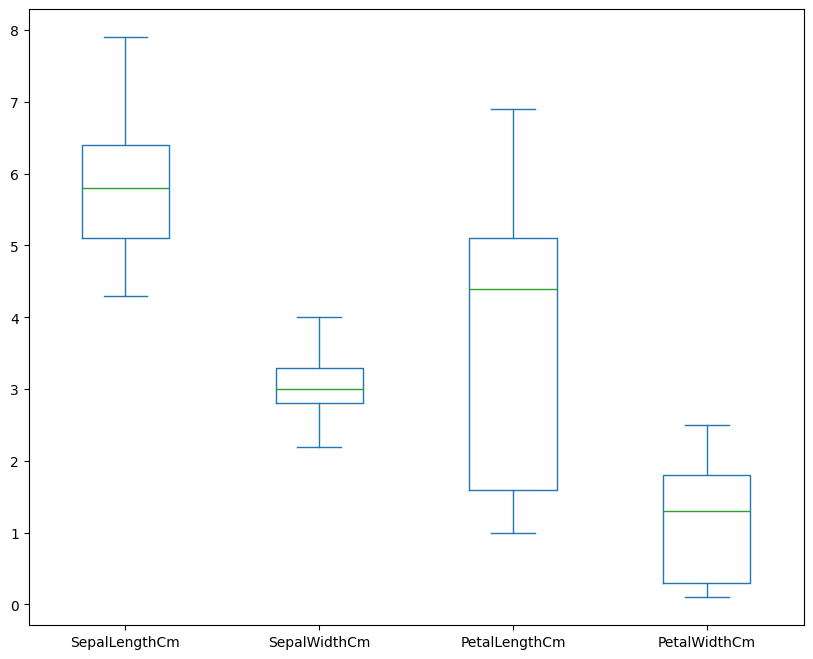

In [78]:
#plotting the boxplot after removing the outliers
plt.rcParams["figure.figsize"]=(10,8)
iris_df.plot(kind="box")
plt.show()

Now our data is free of outliers.

# Visualization

Text(0, 0.5, 'Within Clusters Sum of squares')

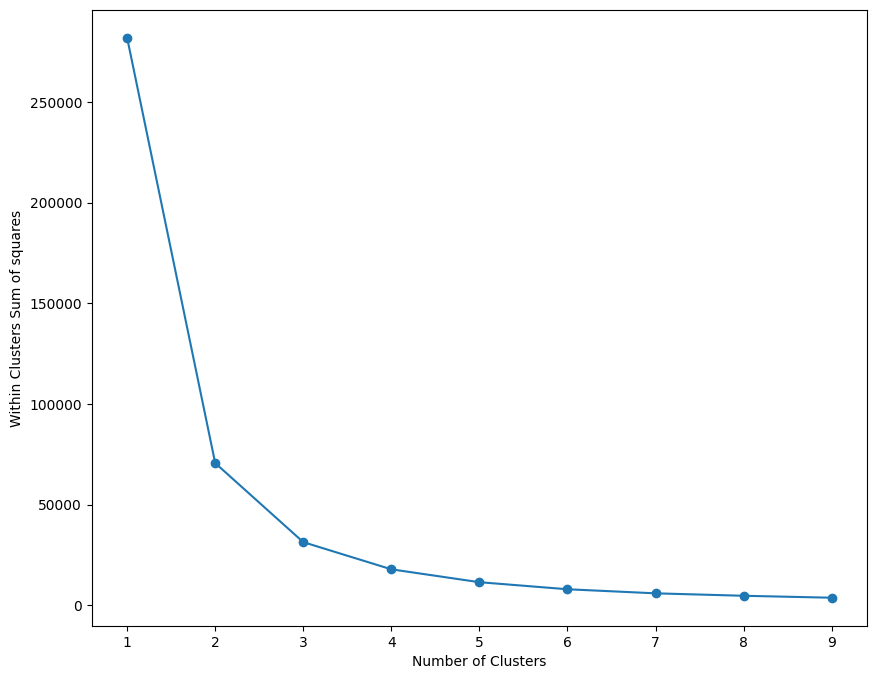

In [79]:
nu_clusters=range(1,10)
plt.plot(nu_clusters,wcss,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of squares')

From the upper graph we came to know that elbow is at 3 so there will be three clusters.

In [80]:
kmeans = KMeans(n_clusters=3,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Clusters


In [81]:

y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

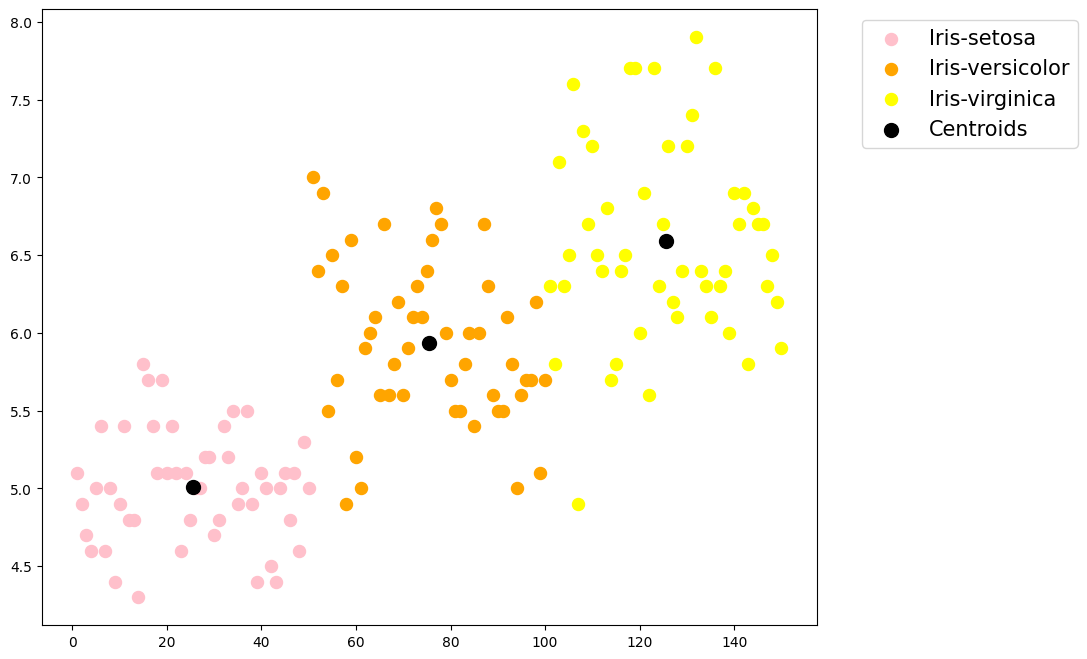

In [82]:
#Visualizing the clusters for the first two columns of the data
plt.scatter(x[ y_kmeans==0,0],x[ y_kmeans==0,1],s=75,c="pink",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,0],x[ y_kmeans==1,1],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,0],x[ y_kmeans==2,1],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

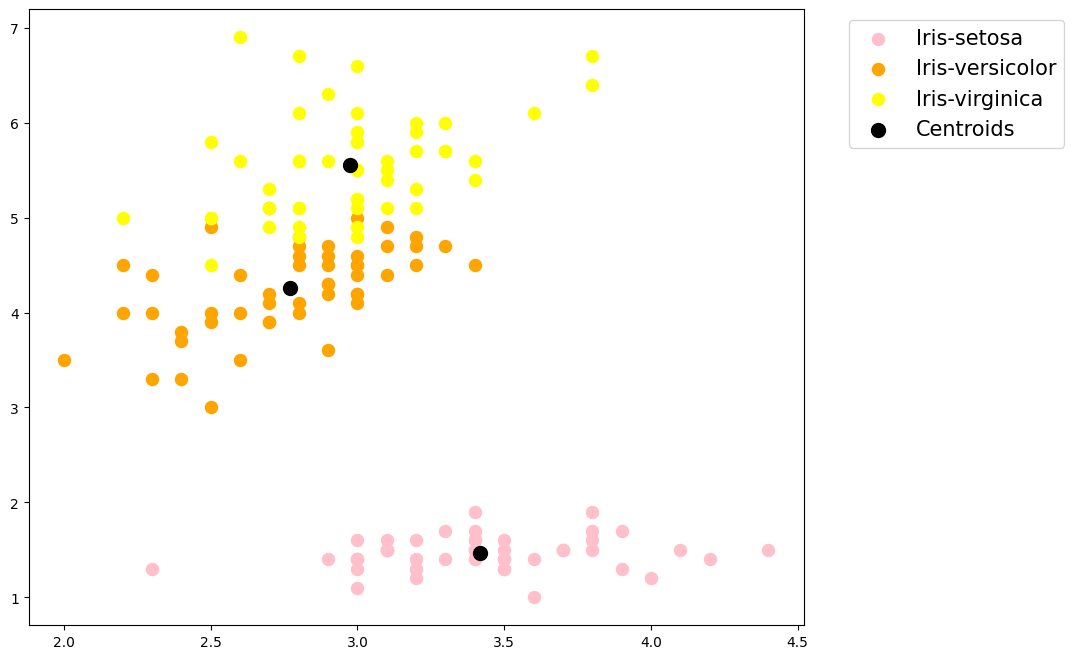

In [83]:
plt.scatter(x[ y_kmeans==0,2],x[ y_kmeans==0,3],s=75,c="pink",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,2],x[ y_kmeans==1,3],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,2],x[ y_kmeans==2,3],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,c="black",label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

And by this way we are able to see the three clusters from the given dataset and visualised it.
